In [1]:
import numpy as np
import pandas as pd
from pydataset import data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

# Linear Regression

In [3]:
from pydataset import data
df = data('Boston')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
from sklearn.linear_model import LinearRegression
X, y = df.drop('medv', axis=1), df['medv']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
lr = LinearRegression().fit(X_train, y_train)

In [4]:
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [-1.15158822e-01  4.99661274e-02  3.04536321e-02  4.71829381e+00
 -1.74014677e+01  3.29827655e+00  1.58280209e-02 -1.40692238e+00
  3.04243338e-01 -1.03973447e-02 -9.13308513e-01  7.70028759e-03
 -6.22942408e-01]
lr.intercept_: 38.067912863420574


In [5]:
print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.7453840545256925
Test set score: 0.7074039246969377


# Logistic Regression

In [4]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
print(X.shape, y.shape)

(569, 30) (569,)


In [7]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
lr = LogisticRegression(max_iter=3000).fit(X_train, y_train)

In [8]:
print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.964824120603015
Test set score: 0.9590643274853801


# Decision Tree

In [12]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data # All the 4 features
y = iris.target # The target

In [14]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
tree_clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [16]:
print(f"Training set score: {tree_clf.score(X_train, y_train)}")
print(f"Test set score: {tree_clf.score(X_test, y_test)}")

Training set score: 0.9714285714285714
Test set score: 0.9333333333333333


In [41]:
df['Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

# SVM

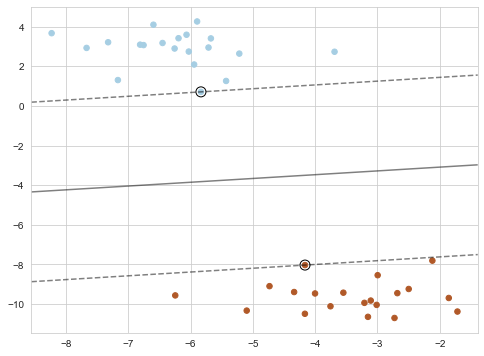

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [18]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
print(X.shape, y.shape)

(569, 30) (569,)


In [19]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
print(f"Training set score: {svc.score(X_train, y_train)}")
print(f"Test set score: {svc.score(X_test, y_test)}")

Training set score: 0.9698492462311558
Test set score: 0.9649122807017544


# Naive Bayes

In [28]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
print(X.shape, y.shape)

(178, 13) (178,)


In [29]:
from sklearn.naive_bayes import GaussianNB 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
gnb = GaussianNB() 
gnb.fit(X_train, y_train)

GaussianNB()

In [30]:
print(f"Training set score: {gnb.score(X_train, y_train)}")
print(f"Test set score: {gnb.score(X_test, y_test)}")

Training set score: 0.9919354838709677
Test set score: 0.9814814814814815


# KNN

In [31]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
print(f"Training set score: {knn.score(X_train, y_train)}")
print(f"Test set score: {knn.score(X_test, y_test)}")

Training set score: 1.0
Test set score: 0.7407407407407407


# K-Means Clustering

In [34]:
from sklearn.datasets import load_iris
x, y = load_iris(return_X_y=True)

In [35]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0)
y_clusters = model.fit_predict(x[:, [0, 1]])
centroids = model.cluster_centers_

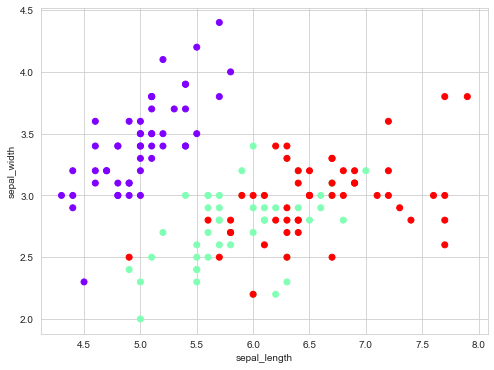

In [37]:
plt.figure(figsize = (8,6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

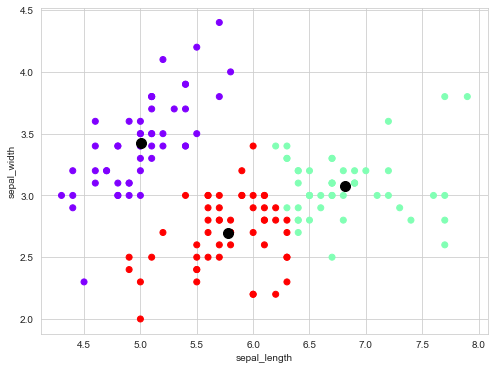

In [36]:
plt.figure(figsize = (8,6))
plt.scatter(x[:, 0], x[:, 1], c=y_clusters, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], s = 100, c = "black")
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [53]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [44]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [51]:
print(f"Training set score: {rf.score(X_train, y_train)}")
print(f"Test set score: {rf.score(X_test, y_test)}")

Training set score: 0.9623115577889447
Test set score: 0.9532163742690059


# GBM

In [62]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
gbm = GradientBoostingClassifier(max_depth=2, random_state=0)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=0)

In [64]:
print(f"Training set score: {gbm.score(X_train, y_train)}")
print(f"Test set score: {gbm.score(X_test, y_test)}")

Training set score: 1.0
Test set score: 0.9707602339181286


# XGB

In [13]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [20]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [21]:
print(f"Training set score: {xgb.score(X_train, y_train)}")
print(f"Test set score: {xgb.score(X_test, y_test)}")

Training set score: 1.0
Test set score: 0.9766081871345029
